In [4]:
# cd to root project

In [6]:
cd /Users/quentinleroy/mva/recvis/project/cmn/

/Users/quentinleroy/mva/recvis/project/cmn


In [16]:
from __future__ import absolute_import, division, print_function

import sys
import os; os.environ['CUDA_VISIBLE_DEVICES'] = ''  # not using GPU 

import tensorflow as tf
import numpy as np
import skimage.io
import skimage.transform
import matplotlib.pylab as plt
%matplotlib inline

from models import visgeno_attention_model, spatial_feat, fastrcnn_vgg_net
from util.visgeno_rel_train.rel_data_reader import DataReader
from util import loss, eval_tools, text_processing

# Batch

In [155]:
# imdb_file = './exp-unrel/unrel_imdb.npy'
imdb_file = './exp-visgeno-rel/data/imdb/imdb_trn.npy'

In [156]:
# Model Params
T = 20
num_vocab = 72704
embed_dim = 300
lstm_dim = 1000

# Data Params
vocab_file = './word_embedding/vocabulary_72700.txt'
im_mean = visgeno_attention_model.fastrcnn_vgg_net.channel_mean

np.random.seed(3)
reader = DataReader(imdb_file, vocab_file, im_mean, shuffle=False, max_bbox_num=10000, max_rel_num=10000)

Loading ROI data from file...Done.


In [157]:
batch = reader.read_batch()

data reader: epoch = 0, batch = 0 / 77398
data reader: waiting for file input (IO is slow)...
data reader: skipped an image. no relationship annotations for image ./exp-visgeno-rel/visgeno-dataset/VG_100K_2/51.jpg


In [158]:
for key in batch:
    print(key)

im_batch
bbox_batch
spatial_batch
expr_obj1_batch
expr_obj2_batch
expr_relation_batch
text_seq_batch
label_weak_batch
label_weak_obj2_batch
label_batch
questions
obj1_component_idx
obj2_component_idx
rel_component_idx


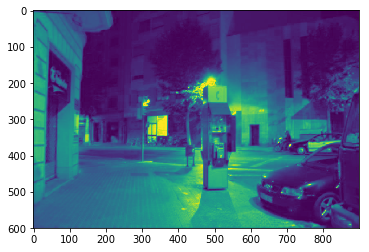

In [159]:
# im_batch

im = batch['im_batch']
plt.imshow(im[0][:,:,0])

In [160]:
# bbox_batch

bbox = batch['bbox_batch']
print("bbox shape:", bbox.shape)
print(bbox)

bbox shape: (30, 5)
[[   0.          604.49438477  356.17977905  850.56176758  588.76403809]
 [   0.          682.02246094   59.55056     732.58422852  249.4382019 ]
 [   0.          528.08984375    4.4943819   850.56176758  379.77526855]
 [   0.          252.80897522  130.33708191  375.28088379  314.60671997]
 [   0.          478.65167236  178.65168762  505.61795044  205.6179657 ]
 [   0.          455.05618286  198.87640381  558.42694092  507.86514282]
 [   0.          591.01123047  306.74157715  629.21343994  375.28088379]
 [   0.          655.05615234  344.94381714  716.85394287  398.87640381]
 [   0.          677.52807617  319.10110474  715.73034668  387.64044189]
 [   0.          301.12359619  243.82022095  323.5954895   270.78649902]
 [   0.          276.40447998  224.71910095  330.33706665  425.84268188]
 [   0.           23.59550476   95.50561523  106.74156952  496.62921143]
 [   0.           22.47190857  413.48312378   94.38201904  514.60675049]
 [   0.          696.62921143  

In [161]:
# spatial batch
spatial = batch['spatial_batch']
print(spatial)

[[ 0.34631264  0.18726587  0.89434695  0.96254683  0.42488056]
 [ 0.51898098 -0.80149812  0.63159072 -0.16853935  0.07127733]
 [ 0.17614663 -0.98501873  0.89434695  0.26591754  0.89842284]
 [-0.43695104 -0.56554306 -0.16418511  0.04868901  0.16754158]
 [ 0.06603932 -0.40449435  0.12609792 -0.31460679  0.00539852]
 [ 0.01348817 -0.33707863  0.24371254  0.69288385  0.23712246]
 [ 0.31628335  0.0224719   0.40136623  0.25093627  0.01943841]
 [ 0.45892239  0.1498127   0.59655666  0.32958806  0.02474325]
 [ 0.50897121  0.0636704   0.59405422  0.29213476  0.01943844]
 [-0.32934612 -0.18726593 -0.27929735 -0.09737831  0.00449876]
 [-0.38439983 -0.25093633 -0.2642827   0.41947556  0.08052795]
 [-0.94744879 -0.68164796 -0.76226819  0.65543067  0.24760103]
 [-0.94995123  0.37827706 -0.78979504  0.71535587  0.05398526]
 [ 0.55151272  0.10486889  0.89935184  0.32584274  0.07686335]
 [-0.31933635 -0.05617982 -0.15918022  0.26591754  0.05158587]
 [ 0.37133706  0.64419472  0.4839468   0.7715354   0.01

In [162]:
# expr_obj1_batch
expr_obj1 = batch['expr_obj1_batch']
print("expr_obj1_batch shape", expr_obj1.shape)
print(expr_obj1)

expr_obj1_batch shape (20, 25)
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0  

In [163]:
# expr_obj2_batch
expr_obj2 = batch['expr_obj2_batch']
print(expr_obj2)

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0   

In [164]:
# expr_relation_batch
expr_relation = batch['expr_relation_batch']
print("shape expr_relation_batch:", expr_relation.shape)
print(expr_relation)

shape expr_relation_batch: (20, 25)
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0   

In [165]:
# text_seq_batch
text_seq = batch['text_seq_batch']
print("text_seq shape:", text_seq.shape)
print(text_seq)

text_seq shape: (20, 25)
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0  

In [166]:
# label_weak_batch
label_weak = batch['label_weak_batch']
print("label weak shape:", label_weak.shape)
print(label_weak)

label weak shape: (25,)
[ 2  3  2  6  8  8 10 12 16 17  0  5  2  6  5  0  8 13  5  0 26  8 28 11 29]


In [167]:
# label_weak_obj2_batch
label_weak_obj2 = batch['label_weak_obj2_batch']
print("label_weak_obj2 shape:", label_weak_obj2.shape)
print(label_weak_obj2)

label_weak_obj2 shape: (25,)
[ 1  2  1  2  7  7  9 11  5  0 17 19  1  2 21 22  7  7 19 19 25  7 27 27 13]


In [168]:
# label batch
label = batch['label_batch']
print("label shape:", label.shape)
print(label)

label shape: (25,)
[ 61  92  61 182 247 247 309 371 485 510  17 169  61 182 171  22 247 397
 169  19 805 247 867 357 883]


In [169]:
# question batchs
questions = batch['questions']
print(questions)

['building has window', 'window of a building', 'building has window', 'entrance OF building', 'person riding motorcycle', 'person riding on motorcycle', 'traffic light IN red', 'doorway without lighting', 'shadow OF phone', 'wheel OF car', 'car has wheel', 'phone ON street', 'building has window', 'entrance OF building', 'phone for pay', 'car has front end', 'man ON motorcycle', 'car next to motorcycle', 'phone ON sidewalk', 'car parked by sidewalk', 'bicycles in front of building', 'person ON motorcycle', 'tree in front building', 'door OF building', 'person riding car']


In [170]:
# obj1_component_idx
obj1_component_idx = batch['obj1_component_idx']
print("obj1_component_idx shape", obj1_component_idx.shape)
print(obj1_component_idx)

obj1_component_idx shape (20, 25)
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False Fals

In [171]:
# obj2_component_idx
obj2_component_idx = batch['obj2_component_idx']
print("obj2_component_idx shape", obj1_component_idx.shape)
print(obj2_component_idx)

obj2_component_idx shape (20, 25)
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False Fals

In [172]:
# rel_component_idx
rel_component_idx = batch['rel_component_idx']
print("rel_component_idx shape", rel_component_idx.shape)
print(rel_component_idx)

rel_component_idx shape (20, 25)
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False]
 [False False False False